In [12]:
import os                       # for working with files
import numpy as np              # for numerical computations
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader, random_split # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
import time
from torchvision import models

# For Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sn

In [22]:
Learning_scratch_palntaeK_vgg16_train_acc = [3.125, 3.125, 3.125, 6.25, 0.0, 3.125, 6.25, 6.25, 9.375, 18.75, 18.75, 31.25, 34.375, 15.625, 15.625, 25.0, 28.125, 31.25, 18.75, 40.625, 34.375, 46.875, 37.5, 40.625, 43.75, 43.75, 37.5, 53.125, 59.375, 34.375, 43.75, 53.125, 40.625, 65.625, 40.625, 50.0, 71.875, 59.375, 53.125, 43.75, 37.5, 62.5, 40.625, 62.5, 62.5, 40.625, 62.5, 53.125, 68.75, 53.125, 56.25, 56.25, 68.75, 56.25, 56.25, 56.25, 78.125, 56.25, 40.625, 81.25, 65.625, 68.75, 59.375, 87.5, 68.75, 68.75, 75.0, 62.5, 68.75, 65.625, 78.125, 68.75, 65.625, 81.25, 71.875, 81.25, 59.375, 75.0, 81.25, 68.75, 84.375, 75.0, 84.375, 81.25, 71.875, 75.0, 71.875, 81.25, 78.125, 71.875, 78.125, 78.125, 65.625, 78.125, 90.625, 71.875, 75.0, 75.0, 84.375, 81.25, 84.375, 81.25, 81.25, 78.125, 87.5, 84.375, 78.125, 59.375, 84.375, 78.125, 81.25, 75.0, 84.375, 78.125, 87.5, 71.875, 78.125, 93.75, 87.5, 93.75, 78.125, 84.375, 93.75, 78.125, 90.625, 75.0, 93.75, 90.625, 96.875, 75.0, 84.375, 96.875, 87.5, 90.625, 87.5, 87.5, 84.375, 81.25, 78.125, 90.625, 87.5, 90.625, 81.25, 87.5, 81.25, 87.5, 100.0, 90.625, 87.5, 90.625, 90.625, 96.875, 93.75, 87.5, 96.875, 93.75, 90.625, 93.75, 90.625, 93.75, 93.75, 93.75, 90.625, 87.5, 87.5, 93.75, 90.625, 90.625, 87.5, 87.5, 78.125, 81.25, 100.0, 90.625, 96.875, 96.875, 87.5, 90.625, 93.75, 81.25, 84.375, 93.75, 96.875, 84.375, 93.75, 96.875, 96.875, 100.0, 96.875, 93.75, 96.875, 90.625, 96.875, 87.5, 96.875, 90.625, 96.875, 93.75, 75.0, 90.625, 93.75, 93.75, 90.625, 93.75, 100.0, 96.875, 84.375, 96.875, 87.5, 93.75, 100.0, 93.75, 90.625, 96.875, 100.0, 93.75, 93.75, 93.75, 93.75, 93.75, 96.875, 100.0, 96.875, 96.875, 100.0, 96.875, 93.75, 100.0, 93.75, 96.875, 96.875, 100.0, 100.0, 100.0, 96.875, 100.0, 96.875, 100.0, 96.875, 96.875, 96.875, 90.625, 93.75, 96.875, 93.75, 93.75, 90.625, 90.625, 90.625, 96.875, 100.0, 93.75, 96.875, 96.875, 90.625, 96.875, 100.0, 96.875, 96.875, 96.875, 96.875, 96.875, 100.0, 96.875, 96.875, 96.875, 100.0, 93.75, 93.75, 100.0, 96.875, 100.0, 96.875, 100.0, 93.75, 100.0, 96.875, 90.625, 90.625, 100.0, 93.75, 96.875, 96.875, 96.875, 96.875, 90.625, 87.5, 100.0, 100.0, 100.0, 93.75, 93.75, 75.0, 90.625, 100.0, 100.0, 93.75, 93.75, 96.875, 100.0, 96.875, 100.0, 96.875, 93.75, 93.75, 87.5, 93.75, 100.0, 93.75, 96.875, 96.875, 100.0, 96.875, 100.0, 96.875, 93.75, 96.875, 100.0, 100.0, 96.875, 96.875, 100.0, 100.0, 100.0, 96.875, 90.625, 93.75, 93.75, 93.75, 100.0, 100.0, 96.875, 96.875, 96.875, 96.875, 100.0, 100.0, 93.75, 93.75, 93.75, 100.0, 100.0, 100.0, 100.0, 100.0, 93.75, 90.625, 100.0, 100.0, 93.75, 96.875, 100.0, 100.0, 96.875, 100.0, 96.875, 100.0, 100.0, 93.75, 100.0, 93.75, 90.625, 93.75, 93.75, 96.875, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 96.875, 96.875, 100.0, 100.0, 100.0, 93.75, 93.75, 96.875, 96.875, 100.0, 93.75, 96.875, 100.0, 96.875, 96.875, 96.875, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 96.875, 100.0, 93.75, 100.0, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 96.875, 96.875, 100.0, 100.0, 96.875, 96.875, 96.875, 100.0, 100.0, 100.0, 93.75, 96.875, 100.0, 100.0, 96.875, 100.0, 100.0, 87.5, 100.0, 96.875, 96.875, 96.875, 100.0, 96.875, 93.75, 93.75, 100.0]
Learning_scratch_palntaeK_vgg16_train_acc = getFieldsForPlot(Learning_scratch_palntaeK_vgg16_train_acc)
Transfer_learning_palntaeK_vgg16_train_acc = [21.875, 65.625, 62.5, 68.75, 75.0, 81.25, 59.375, 81.25, 84.375, 62.5, 75.0, 75.0, 81.25, 81.25, 84.375, 90.625, 71.875, 87.5, 71.875, 81.25, 81.25, 90.625, 87.5, 93.75, 78.125, 78.125, 90.625, 87.5, 96.875, 81.25, 87.5, 90.625, 81.25, 93.75, 90.625, 90.625, 84.375, 90.625, 96.875, 90.625, 84.375, 90.625, 93.75, 96.875, 81.25, 96.875, 87.5, 84.375, 87.5, 93.75, 93.75, 90.625, 100.0, 100.0, 90.625, 93.75, 96.875, 93.75, 96.875, 87.5, 93.75, 84.375, 90.625, 96.875, 93.75, 90.625, 100.0, 96.875, 100.0, 96.875, 93.75, 90.625, 100.0, 96.875, 93.75, 96.875, 93.75, 90.625, 100.0, 100.0, 93.75, 93.75, 100.0, 96.875, 96.875, 100.0, 90.625, 93.75, 96.875, 93.75, 93.75, 90.625, 96.875, 93.75, 90.625, 100.0, 100.0, 96.875, 96.875, 100.0, 93.75, 100.0, 93.75, 100.0, 96.875, 100.0, 93.75, 87.5, 93.75, 96.875, 100.0, 93.75, 100.0, 100.0, 100.0, 90.625, 96.875, 90.625, 100.0, 93.75, 96.875, 100.0, 93.75, 96.875, 100.0, 96.875, 96.875, 100.0, 100.0, 96.875, 96.875, 93.75, 93.75, 100.0, 93.75, 100.0, 100.0, 100.0, 96.875, 100.0, 96.875, 96.875, 96.875, 93.75, 100.0, 93.75, 96.875, 96.875, 96.875, 96.875, 100.0, 100.0, 100.0, 96.875, 96.875, 100.0, 100.0, 100.0, 96.875, 100.0, 96.875, 100.0, 100.0, 100.0, 93.75, 100.0, 100.0, 100.0, 96.875, 100.0, 93.75, 90.625, 96.875, 90.625, 96.875, 96.875, 96.875, 100.0, 100.0, 96.875, 96.875, 96.875, 96.875, 96.875, 96.875, 100.0, 96.875, 96.875, 100.0, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 96.875, 100.0, 96.875, 96.875, 100.0, 100.0, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 93.75, 93.75, 100.0, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 100.0, 100.0, 93.75, 96.875, 96.875, 100.0, 100.0, 96.875, 96.875, 100.0, 100.0, 96.875, 100.0, 100.0, 96.875, 100.0, 100.0, 93.75, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 96.875, 96.875, 96.875, 96.875, 96.875, 100.0, 96.875, 100.0, 100.0, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 100.0, 96.875, 96.875, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 100.0, 100.0, 96.875, 96.875, 96.875, 100.0, 96.875, 96.875, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 96.875, 100.0, 93.75, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
Transfer_learning_palntaeK_vgg16_train_acc = getFieldsForPlot(Transfer_learning_palntaeK_vgg16_train_acc)

In [23]:
def getFieldsForPlot(palntaeK_train_acc):
    output = []
    sum  = 0
    for i in range(len(palntaeK_train_acc)):
        sum +=  palntaeK_train_acc[i]
        if (i % 11 == 10):
            output.append(sum/11)
            sum = 0
    return output
    

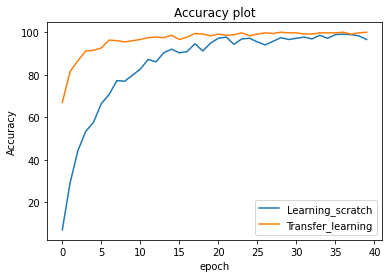

In [24]:
epochs = [i for i in range(len(Learning_scratch_palntaeK_vgg16_train_acc))]
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')

plt.plot(Learning_scratch_palntaeK_vgg16_train_acc, label="Learning_scratch")
plt.plot(Transfer_learning_palntaeK_vgg16_train_acc, label="Transfer_learning")

    
plt.legend(loc="lower right")
plt.savefig('/kaggle/working/Accuracy_Plot_PlantaeK')
plt.show()

In [25]:
Resnet_palntVillage_train_acc = [87.5, 81.25, 84.375, 100.0, 93.75, 96.875, 93.75, 93.75, 100.0, 96.875, 90.625, 96.875, 100.0, 100.0, 93.75, 96.875, 93.75, 96.875, 93.75, 90.625, 96.875, 87.5, 96.875, 96.875, 93.75, 90.625, 96.875, 93.75, 96.875, 93.75, 93.75, 96.875, 96.875, 96.875, 90.625, 100.0, 100.0, 96.875, 96.875, 96.875, 96.875, 93.75, 96.875, 93.75, 93.75, 93.75, 96.875, 93.75, 100.0, 100.0, 96.875, 100.0, 100.0, 93.75, 84.375, 96.875, 100.0, 96.875, 90.625, 100.0, 96.875, 96.875, 90.625, 96.875, 96.875, 93.75, 96.875, 100.0, 96.875, 96.875, 96.875, 96.875, 100.0, 96.875, 96.875, 96.875, 90.625, 96.875, 87.5, 100.0, 96.875, 96.875, 96.875, 96.875, 90.625, 93.75, 96.875, 96.875, 100.0, 90.625, 93.75, 87.5, 90.625, 100.0, 96.875, 96.875, 90.625, 100.0, 96.875, 100.0, 96.875, 93.75, 90.625, 87.5, 93.75, 100.0, 100.0, 100.0, 100.0, 93.75, 96.875, 100.0, 100.0, 96.875, 96.875, 96.875, 90.625, 96.875, 100.0, 87.5, 96.875, 100.0, 93.75, 96.875, 100.0, 96.875, 100.0, 100.0, 100.0, 93.75, 93.75, 93.75, 96.875, 93.75, 100.0, 96.875, 100.0, 100.0, 96.875, 90.625, 96.875, 96.875, 96.875, 100.0, 100.0, 90.625, 96.875, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 96.875, 90.625, 96.875, 96.875, 100.0, 100.0, 100.0, 100.0, 93.75, 93.75, 96.875, 90.625, 100.0, 96.875, 96.875, 100.0, 96.875, 100.0, 96.875, 100.0, 100.0, 96.875, 100.0, 100.0, 90.625, 96.875, 93.75, 96.875, 100.0, 96.875, 100.0, 96.875, 100.0, 100.0, 100.0, 100.0, 93.75, 100.0, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 96.875, 100.0, 100.0, 100.0, 96.875, 93.75, 96.875, 100.0, 100.0, 93.75, 90.625, 100.0, 100.0, 93.75, 96.875, 100.0, 93.75, 100.0, 93.75, 93.75, 100.0, 87.5, 100.0, 96.875, 93.75, 100.0, 100.0, 100.0, 100.0, 100.0, 96.875, 96.875, 93.75, 100.0, 100.0, 96.875, 100.0, 100.0, 96.875, 96.875, 93.75, 100.0, 93.75, 96.875, 93.75, 100.0, 100.0, 100.0, 96.875, 100.0, 90.625, 96.875, 100.0, 96.875, 96.875, 96.875, 93.75, 96.875, 96.875, 93.75, 90.625, 93.75, 100.0, 96.875, 100.0, 96.875, 100.0, 96.875, 96.875, 87.5, 93.75, 100.0, 96.875, 100.0, 100.0, 100.0, 93.75, 96.875, 100.0, 93.75, 96.875, 96.875, 96.875, 100.0, 100.0, 100.0, 96.875, 100.0, 100.0, 96.875, 100.0, 100.0, 96.875, 90.625, 96.875, 100.0, 96.875, 96.875, 100.0, 96.875, 96.875, 96.875, 93.75, 100.0, 100.0, 100.0, 93.75, 100.0, 100.0, 90.625, 96.875, 96.875, 100.0, 96.875, 100.0, 96.875, 100.0, 100.0, 93.75, 90.625, 100.0, 96.875, 96.875, 96.875, 93.75, 96.875, 100.0, 96.875, 93.75, 93.75, 93.75, 96.875, 93.75, 100.0, 93.75, 100.0, 96.875, 100.0, 96.875, 96.875, 100.0, 100.0, 100.0, 100.0, 96.875, 96.875, 96.875, 96.875, 96.875, 93.75, 100.0, 96.875, 100.0, 100.0, 96.875, 96.875, 100.0, 100.0, 100.0, 100.0, 96.875, 100.0, 96.875, 100.0, 100.0, 96.875, 100.0, 93.75, 100.0, 90.625, 100.0, 100.0, 93.75, 90.625, 100.0, 93.75, 96.875, 93.75, 93.75, 93.75, 100.0, 100.0, 100.0, 96.875, 90.625, 100.0, 100.0, 100.0, 100.0, 96.875, 100.0, 96.875, 96.875, 96.875, 96.875, 100.0, 100.0, 100.0, 96.875, 96.875, 100.0, 96.875, 100.0, 100.0, 100.0, 96.875, 96.875, 100.0, 93.75, 100.0, 100.0, 100.0, 96.875, 100.0, 93.75, 100.0, 100.0, 100.0, 96.875, 100.0, 96.875, 96.875, 100.0, 100.0, 96.875, 100.0, 93.75, 100.0, 96.875, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 96.875, 93.75, 100.0, 96.875, 100.0, 93.75, 96.875]
Resnet_palntVillage_train_acc = getFieldsForPlot(Resnet_palntVillage_train_acc)
Resnet_palntDoc_train_acc = [6.25, 21.875, 18.75, 34.375, 34.375, 37.5, 40.625, 46.875, 46.875, 46.875, 68.96551724137932, 62.5, 50.0, 65.625, 46.875, 65.625, 43.75, 50.0, 53.125, 65.625, 59.375, 58.620689655172406, 53.125, 62.5, 62.5, 56.25, 62.5, 75.0, 71.875, 71.875, 62.5, 65.625, 58.620689655172406, 68.75, 71.875, 56.25, 56.25, 84.375, 62.5, 71.875, 68.75, 71.875, 56.25, 72.41379310344827, 78.125, 81.25, 81.25, 50.0, 68.75, 62.5, 68.75, 53.125, 68.75, 71.875, 65.51724137931035, 81.25, 75.0, 62.5, 68.75, 75.0, 84.375, 71.875, 62.5, 71.875, 65.625, 68.96551724137932, 71.875, 84.375, 75.0, 78.125, 71.875, 81.25, 75.0, 81.25, 65.625, 59.375, 62.06896551724138, 75.0, 81.25, 84.375, 78.125, 68.75, 75.0, 78.125, 71.875, 59.375, 81.25, 75.86206896551724, 78.125, 87.5, 75.0, 78.125, 81.25, 65.625, 84.375, 68.75, 78.125, 75.0, 72.41379310344827, 81.25, 87.5, 75.0, 84.375, 81.25, 71.875, 81.25, 81.25, 71.875, 81.25, 79.3103448275862, 87.5, 84.375, 87.5, 71.875, 68.75, 78.125, 78.125, 68.75, 81.25, 90.625, 65.51724137931035, 75.0, 93.75, 78.125, 87.5, 78.125, 81.25, 90.625, 78.125, 81.25, 84.375, 86.20689655172413, 90.625, 87.5, 84.375, 84.375, 87.5, 81.25, 84.375, 93.75, 84.375, 87.5, 82.75862068965517, 90.625, 81.25, 81.25, 87.5, 81.25, 81.25, 84.375, 75.0, 78.125, 84.375, 75.86206896551724, 81.25, 78.125, 87.5, 90.625, 87.5, 78.125, 93.75, 81.25, 81.25, 81.25, 86.20689655172413, 75.0, 84.375, 87.5, 93.75, 87.5, 84.375, 75.0, 90.625, 78.125, 90.625, 65.51724137931035, 84.375, 78.125, 81.25, 78.125, 90.625, 75.0, 87.5, 68.75, 78.125, 81.25, 86.20689655172413, 71.875, 81.25, 93.75, 93.75, 93.75, 96.875, 87.5, 78.125, 81.25, 81.25, 82.75862068965517, 93.75, 75.0, 87.5, 81.25, 65.625, 78.125, 96.875, 93.75, 96.875, 93.75, 79.3103448275862, 87.5, 93.75, 75.0, 93.75, 93.75, 93.75, 75.0, 84.375, 90.625, 84.375, 93.10344827586206, 93.75, 84.375, 93.75, 87.5, 93.75, 87.5, 84.375, 84.375, 84.375, 84.375, 82.75862068965517, 87.5, 84.375, 90.625, 84.375, 87.5, 81.25, 93.75, 78.125, 90.625, 87.5, 93.10344827586206, 96.875, 87.5, 90.625, 100.0, 84.375, 84.375, 81.25, 93.75, 81.25, 90.625, 79.3103448275862, 100.0, 90.625, 93.75, 87.5, 96.875, 93.75, 78.125, 81.25, 93.75, 90.625, 82.75862068965517, 87.5, 81.25, 93.75, 93.75, 81.25, 84.375, 93.75, 96.875, 90.625, 90.625, 86.20689655172413, 96.875, 84.375, 90.625, 87.5, 84.375, 81.25, 90.625, 84.375, 87.5, 81.25, 86.20689655172413, 90.625, 96.875, 90.625, 87.5, 100.0, 90.625, 90.625, 93.75, 90.625, 81.25, 86.20689655172413, 96.875, 84.375, 81.25, 90.625, 100.0, 84.375, 93.75, 87.5, 87.5, 84.375, 96.55172413793103, 96.875, 93.75, 90.625, 90.625, 84.375, 87.5, 90.625, 87.5, 87.5, 84.375, 96.55172413793103, 87.5, 81.25, 87.5, 93.75, 87.5, 100.0, 96.875, 87.5, 81.25, 96.875, 86.20689655172413, 90.625, 90.625, 84.375, 84.375, 84.375, 93.75, 87.5, 90.625, 87.5, 90.625, 89.65517241379311, 87.5, 87.5, 96.875, 84.375, 90.625, 90.625, 87.5, 90.625, 78.125, 93.75, 82.75862068965517, 93.75, 93.75, 93.75, 93.75, 96.875, 90.625, 96.875, 78.125, 71.875, 96.875, 75.86206896551724, 81.25, 93.75, 96.875, 96.875, 93.75, 93.75, 90.625, 84.375, 90.625, 87.5, 89.65517241379311, 87.5, 96.875, 78.125, 93.75, 100.0, 87.5, 90.625, 93.75, 78.125, 87.5, 93.10344827586206, 93.75, 84.375, 96.875, 90.625, 87.5, 96.875, 93.75, 93.75, 84.375, 84.375, 82.75862068965517, 90.625, 90.625, 93.75, 96.875, 96.875, 75.0, 96.875, 96.875, 71.875, 100.0, 100.0, 87.5, 90.625, 100.0, 100.0, 90.625, 90.625, 84.375, 87.5, 93.75, 96.875, 89.65517241379311, 90.625, 93.75, 78.125, 90.625, 93.75, 93.75, 81.25, 75.0, 78.125, 90.625, 89.65517241379311, 90.625, 96.875, 96.875, 81.25, 87.5, 84.375, 81.25, 93.75, 93.75, 93.75, 86.20689655172413]
Resnet_palntDoc_train_acc = getFieldsForPlot(Resnet_palntDoc_train_acc)
Resnet_palntaeK_train_acc = [31.25, 53.125, 59.375, 68.75, 59.375, 75.0, 68.75, 84.375, 81.25, 78.125, 78.125, 75.0, 75.0, 81.25, 87.5, 81.25, 78.125, 93.75, 75.0, 96.875, 81.25, 87.5, 90.625, 87.5, 90.625, 90.625, 78.125, 90.625, 81.25, 84.375, 87.5, 71.875, 75.0, 78.125, 93.75, 87.5, 90.625, 84.375, 90.625, 96.875, 84.375, 93.75, 84.375, 93.75, 100.0, 93.75, 90.625, 84.375, 81.25, 87.5, 93.75, 93.75, 87.5, 90.625, 93.75, 87.5, 90.625, 96.875, 93.75, 81.25, 87.5, 90.625, 100.0, 87.5, 90.625, 90.625, 93.75, 87.5, 93.75, 87.5, 81.25, 87.5, 81.25, 93.75, 87.5, 93.75, 84.375, 78.125, 93.75, 90.625, 93.75, 90.625, 90.625, 90.625, 90.625, 90.625, 90.625, 96.875, 87.5, 93.75, 93.75, 87.5, 90.625, 90.625, 90.625, 93.75, 93.75, 100.0, 96.875, 100.0, 87.5, 93.75, 90.625, 93.75, 90.625, 90.625, 90.625, 100.0, 84.375, 87.5, 96.875, 96.875, 87.5, 96.875, 90.625, 96.875, 96.875, 84.375, 87.5, 93.75, 93.75, 96.875, 90.625, 93.75, 93.75, 90.625, 100.0, 87.5, 81.25, 93.75, 93.75, 93.75, 93.75, 87.5, 100.0, 90.625, 100.0, 84.375, 78.125, 100.0, 93.75, 93.75, 84.375, 78.125, 93.75, 93.75, 90.625, 90.625, 100.0, 84.375, 100.0, 96.875, 96.875, 96.875, 93.75, 84.375, 90.625, 87.5, 87.5, 100.0, 96.875, 90.625, 96.875, 81.25, 96.875, 93.75, 100.0, 93.75, 87.5, 90.625, 96.875, 93.75, 96.875, 93.75, 93.75, 96.875, 96.875, 96.875, 93.75, 90.625, 93.75, 87.5, 90.625, 90.625, 96.875, 96.875, 96.875, 100.0, 93.75, 96.875, 93.75, 81.25, 96.875, 93.75, 90.625, 93.75, 93.75, 93.75, 93.75, 90.625, 93.75, 96.875, 93.75, 96.875, 96.875, 100.0, 93.75, 100.0, 93.75, 96.875, 93.75, 100.0, 96.875, 93.75, 93.75, 100.0, 96.875, 93.75, 100.0, 96.875, 96.875, 87.5, 87.5, 96.875, 90.625, 100.0, 100.0, 93.75, 90.625, 96.875, 96.875, 93.75, 93.75, 81.25, 96.875, 93.75, 90.625, 100.0, 96.875, 100.0, 96.875, 93.75, 93.75, 100.0, 90.625, 96.875, 87.5, 96.875, 90.625, 93.75, 87.5, 93.75, 96.875, 100.0, 87.5, 90.625, 90.625, 100.0, 96.875, 93.75, 96.875, 93.75, 96.875, 96.875, 87.5, 93.75, 87.5, 96.875, 96.875, 93.75, 90.625, 96.875, 90.625, 87.5, 96.875, 96.875, 100.0, 100.0, 100.0, 96.875, 96.875, 90.625, 78.125, 96.875, 100.0, 93.75, 90.625, 96.875, 90.625, 93.75, 96.875, 87.5, 100.0, 96.875, 96.875, 96.875, 93.75, 100.0, 100.0, 100.0, 96.875, 93.75, 90.625, 96.875, 100.0, 100.0, 100.0, 93.75, 100.0, 87.5, 100.0, 100.0, 100.0, 90.625, 96.875, 100.0, 96.875, 96.875, 87.5, 96.875, 96.875, 100.0, 93.75, 90.625, 96.875, 93.75, 93.75, 100.0, 93.75, 100.0, 96.875, 93.75, 100.0, 100.0, 96.875, 96.875, 100.0, 96.875, 90.625, 100.0, 93.75, 100.0, 96.875, 90.625, 96.875, 100.0, 93.75, 87.5, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 93.75, 96.875, 90.625, 93.75, 100.0, 93.75, 100.0, 96.875, 96.875, 87.5, 96.875, 96.875, 100.0, 96.875, 96.875, 96.875, 100.0, 96.875, 96.875, 96.875, 96.875, 96.875, 100.0, 90.625, 100.0, 93.75, 93.75, 96.875, 100.0, 93.75, 93.75, 90.625, 90.625, 96.875, 93.75, 100.0, 96.875, 93.75, 96.875, 96.875, 100.0, 96.875, 93.75, 100.0, 100.0, 100.0, 100.0, 96.875, 90.625, 100.0, 100.0, 100.0, 93.75, 93.75, 96.875, 93.75, 96.875, 93.75, 96.875, 100.0, 90.625, 100.0, 90.625, 96.875, 96.875, 100.0, 93.75, 93.75, 100.0, 96.875, 96.875, 93.75, 96.875, 100.0, 96.875, 96.875, 93.75, 96.875, 100.0, 96.875, 90.625, 100.0, 96.875, 93.75, 96.875, 90.625]
Resnet_palntaeK_train_acc = getFieldsForPlot(Resnet_palntaeK_train_acc)

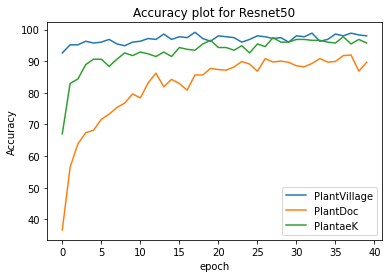

In [26]:
epochs = [i for i in range(len(Resnet_palntVillage_train_acc))]
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot for Resnet50')

plt.plot(Resnet_palntVillage_train_acc, label="PlantVillage")
plt.plot(Resnet_palntDoc_train_acc, label="PlantDoc")
plt.plot(Resnet_palntaeK_train_acc, label="PlantaeK")
    
plt.legend(loc="lower right")
plt.savefig('/kaggle/working/Accuracy_Plot_Resnet')
plt.show()